In [211]:
%matplotlib inline
from datetime import datetime
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

In [213]:
# Read csv-file
all_games = pd.read_csv('games.csv')
all_games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [537]:
all_games.shape

(62670, 21)

In [540]:
all_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62670 entries, 0 to 62669
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 62670 non-null  int64  
 1   competition_id          62670 non-null  object 
 2   season                  62670 non-null  int64  
 3   round                   62670 non-null  object 
 4   date                    62670 non-null  object 
 5   home_club_id            62670 non-null  int64  
 6   away_club_id            62670 non-null  int64  
 7   home_club_goals         62670 non-null  int64  
 8   away_club_goals         62670 non-null  int64  
 9   home_club_position      44244 non-null  float64
 10  away_club_position      44244 non-null  float64
 11  home_club_manager_name  61986 non-null  object 
 12  away_club_manager_name  61986 non-null  object 
 13  stadium                 62481 non-null  object 
 14  attendance              53595 non-null

In [518]:
all_games.dtypes

game_id                     int64
competition_id             object
season                      int64
round                      object
date                       object
home_club_id                int64
away_club_id                int64
home_club_goals             int64
away_club_goals             int64
home_club_position        float64
away_club_position        float64
home_club_manager_name     object
away_club_manager_name     object
stadium                    object
attendance                float64
referee                    object
url                        object
home_club_name             object
away_club_name             object
aggregate                  object
competition_type           object
dtype: object

In [527]:
club_names = all_games.home_club_name.unique() # 424 clubs

In [532]:
np.sum(all_games.isnull()) # Sum of missing data per column

game_id                       0
competition_id                0
season                        0
round                         0
date                          0
home_club_id                  0
away_club_id                  0
home_club_goals               0
away_club_goals               0
home_club_position        18426
away_club_position        18426
home_club_manager_name      684
away_club_manager_name      684
stadium                     189
attendance                 9075
referee                     575
url                           0
home_club_name            10555
away_club_name             9476
aggregate                     0
competition_type              0
dtype: int64

In [214]:
def sort_by_matchday(club_df: DataFrame) -> DataFrame:
    club_df['matchday'] = club_df['round'].apply(lambda x: x.split('.')[0])
    club_df['matchday'] = club_df['matchday'].astype('int64')
    club_df.drop('round', axis=1, inplace=True)
    club_df = club_df.sort_values(by='matchday')
    return club_df

In [217]:
def club_stats(club: str, season: int, games: DataFrame, competition: str) -> DataFrame:
    '''Retrieves club stats depending on club names, season and competition sorted by date'''
    comp_df = games.loc[(games.competition_id) == competition]
    club_stats = (comp_df.home_club_name == club) & (comp_df.season == season) | (comp_df.away_club_name == club) & (comp_df.season == season)
    club_stats = comp_df.loc[club_stats]
    club_stats = club_stats.sort_values(by=['date'])
    club_stats.reset_index().drop('index', axis=1)
    club_stats.index = [i for i in range(1, len(club_stats['round']) + 1)]
    return club_stats

In [219]:
def home_away_stats(club_df: DataFrame, club_name: str) -> tuple:
    '''Returns home and away club stats'''
    home_stats = club_df.loc[club_df.home_club_name == club_name]
    away_stats = club_df.loc[club_df.away_club_name == club_name]
    return home_stats, away_stats

In [221]:
mu = 'Manchester United'
mu_2022 = club_stats(mu, 2022, all_games, 'GB1')
mu_h, mu_a = home_away_stats(mu_2022, mu)

In [223]:
mc = 'Manchester City'
mc_2022 = club_stats(mc, 2022, all_games, 'GB1')
mc_h, mc_a = home_away_stats(mc_2022, mc)

In [225]:
mu_h_sorted = sort_by_matchday(mu_h)
mc_h_sorted = sort_by_matchday(mc_h)
mu_a_sorted = sort_by_matchday(mu_a)
mc_a_sorted = sort_by_matchday(mc_a)

/tmp/ipykernel_1371/1215549241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_df['matchday'] = club_df['round'].apply(lambda x: x.split('.')[0])
/tmp/ipykernel_1371/1215549241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_df['matchday'] = club_df['matchday'].astype('int64')
/tmp/ipykernel_1371/1215549241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

'\nAnother way to create a figure with subplots\n\naxes1 = fig.add_subplot(2, 2, 1)\naxes2 = fig.add_subplot(2, 2, 2)\naxes3 = fig.add_subplot(2, 2, 3)\naxes4 = fig.add_subplot(2, 2, 4)\n\naxes1.plot([i for i in range(1, 20)], mu_h_sorted.home_club_goals, \'r-o\')\naxes2.plot([i for i in range(1, 20)], mc_h_sorted.home_club_goals, \'b-o\')\naxes3.plot([i for i in range(1, 20)], mu_h_sorted.away_club_goals, \'r-o\')\naxes4.plot([i for i in range(1, 20)], mc_h_sorted.away_club_goals, \'b-o\')\n\naxes1.set_yticks([i for i in range(8)])\naxes2.set_yticks([i for i in range(8)])\naxes3.set_yticks([i for i in range(8)])\naxes4.set_yticks([i for i in range(8)])\n\naxes1.set_xticks([i for i in range(1, 20)])\naxes2.set_xticks([i for i in range(1, 20)])\naxes3.set_xticks([i for i in range(1, 20)])\naxes4.set_xticks([i for i in range(1, 20)])\n\naxes1.set_title("MU goals scored at home")\naxes2.set_title("MC goals scored at home")\naxes3.set_title("MU goals scored away")\naxes4.set_title("MC goal

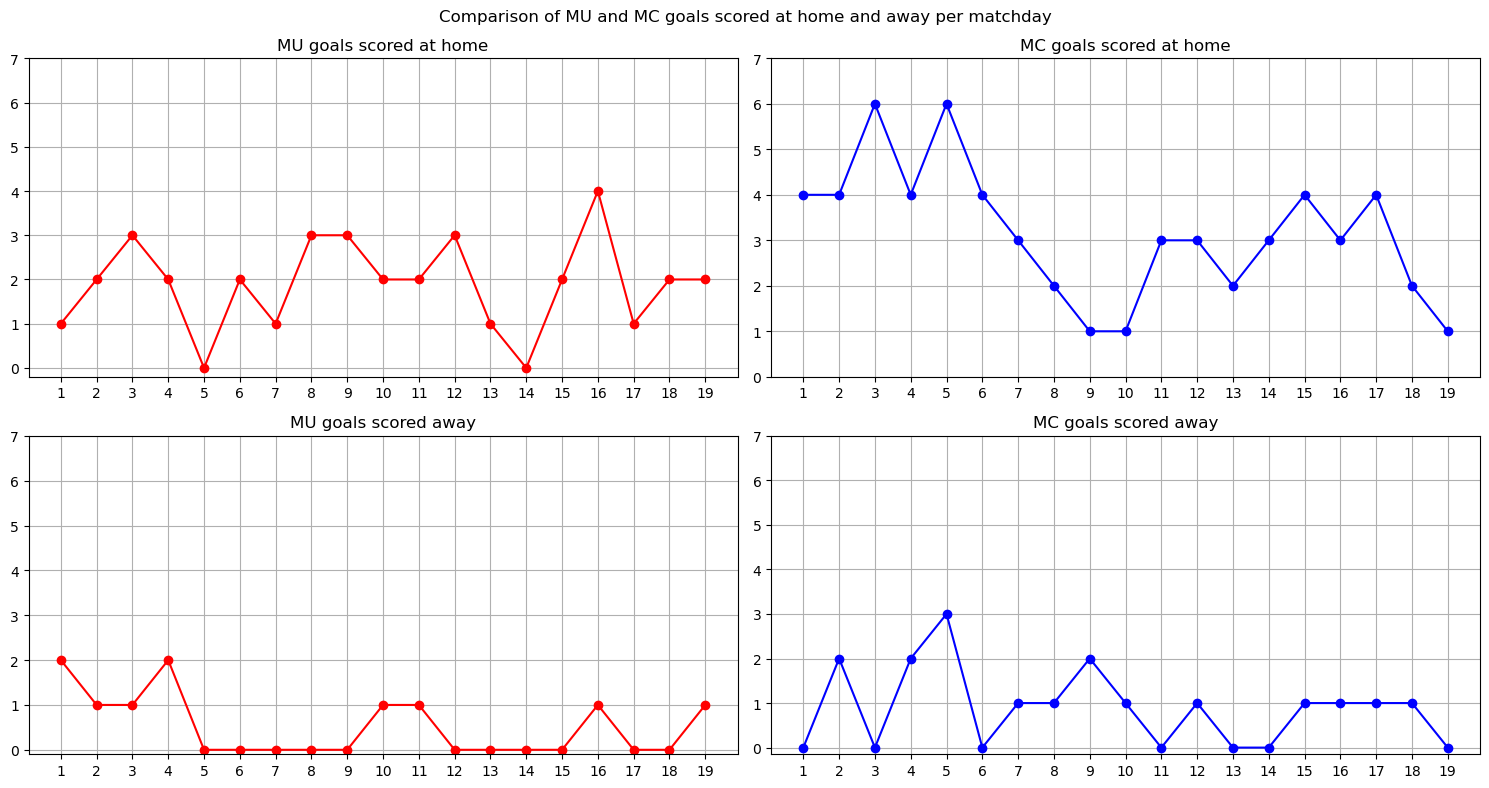

In [493]:
# Comparison of MU and MC goals scored at home and away per matchday
fig = plt.figure(figsize=(15, 8))

goals = [mu_h_sorted.home_club_goals, mc_h_sorted.home_club_goals, mu_h_sorted.away_club_goals, mc_h_sorted.away_club_goals]

for idx, goal in enumerate(goals):
    idx += 1
    axes = fig.add_subplot(2, 2, idx)
    if idx == 1:
        axes.plot([i for i in range(1, 20)], goal, 'r-o')
        axes.set_title("MU goals scored at home")
    elif idx == 2:
        axes.plot([i for i in range(1, 20)], goal, 'b-o')
        axes.set_title("MC goals scored at home")
    elif idx == 3:
        axes.plot([i for i in range(1, 20)], goal, 'r-o')
        axes.set_title("MU goals scored away")
    elif idx == 4:
        axes.plot([i for i in range(1, 20)], goal, 'b-o')
        axes.set_title("MC goals scored away")
    else:
        continue
    axes.set_yticks([i for i in range(8)])
    axes.set_xticks([i for i in range(1, 20)])
    axes.grid()

fig.suptitle("Comparison of MU and MC goals scored at home and away per matchday")
fig.set_tight_layout(True)
        
'''
Another way to create a figure with subplots

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.plot([i for i in range(1, 20)], mu_h_sorted.home_club_goals, 'r-o')
axes2.plot([i for i in range(1, 20)], mc_h_sorted.home_club_goals, 'b-o')
axes3.plot([i for i in range(1, 20)], mu_h_sorted.away_club_goals, 'r-o')
axes4.plot([i for i in range(1, 20)], mc_h_sorted.away_club_goals, 'b-o')

axes1.set_yticks([i for i in range(8)])
axes2.set_yticks([i for i in range(8)])
axes3.set_yticks([i for i in range(8)])
axes4.set_yticks([i for i in range(8)])

axes1.set_xticks([i for i in range(1, 20)])
axes2.set_xticks([i for i in range(1, 20)])
axes3.set_xticks([i for i in range(1, 20)])
axes4.set_xticks([i for i in range(1, 20)])

axes1.set_title("MU goals scored at home")
axes2.set_title("MC goals scored at home")
axes3.set_title("MU goals scored away")
axes4.set_title("MC goals scored away")


axes1.grid()
axes2.grid()
axes3.grid()
axes4.grid()

fig.suptitle("Comparison of MU and MC goals scored at home and away")
fig.set_tight_layout(True)
'''

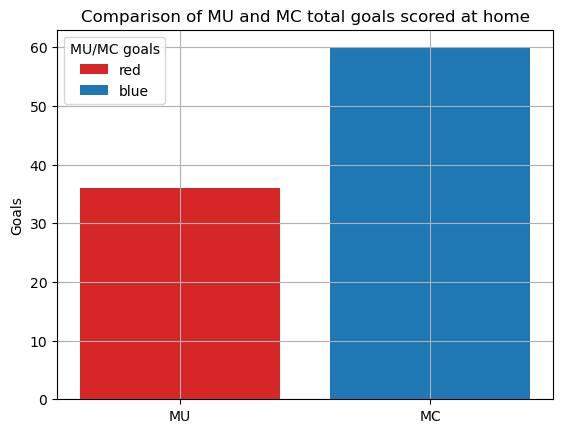

In [228]:
mu_mc = ['MU', 'MC']
counts = [mu_h_sorted.home_club_goals.sum(), mc_h_sorted.home_club_goals.sum()]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

plt.bar(mu_mc, counts, label=bar_labels, color=bar_colors)
plt.ylabel('Goals')
plt.title('Comparison of MU and MC total goals scored at home')
plt.legend(title='MU/MC goals')
plt.grid()
plt.show()

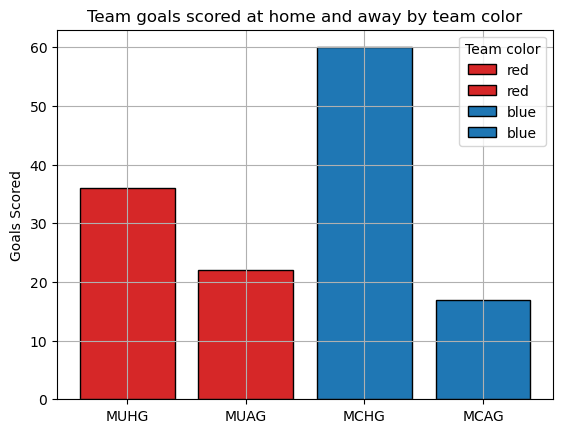

In [497]:
fig, ax = plt.subplots()

counts = [mu_h_sorted.home_club_goals.sum(), mu_a_sorted.away_club_goals.sum(), mc_h_sorted.home_club_goals.sum(), mc_h_sorted.away_club_goals.sum()]
goals = ['MUHG', 'MUAG', 'MCHG', 'MCAG']
bar_labels = ['red', 'red', 'blue', 'blue']
bar_colors = ['tab:red', 'tab:red', 'tab:blue', 'tab:blue']

ax.bar(goals, counts, label=bar_labels, color=bar_colors, edgecolor='black')

ax.set_ylabel('Goals Scored')
ax.set_title('Team goals scored at home and away by team color')
ax.legend(title='Team color')
ax.grid()
plt.show()

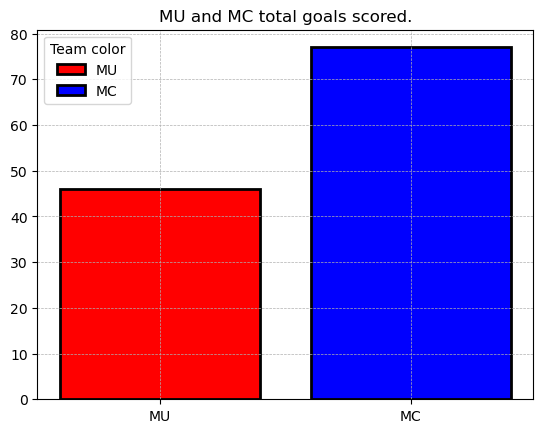

In [495]:
fig, ax = plt.subplots()

mu_total_g = mu_h_sorted.home_club_goals.sum() + mu_h_sorted.away_club_goals.sum()
mc_total_g = mc_h_sorted.home_club_goals.sum() + mc_h_sorted.away_club_goals.sum()
goals = [mu_total_g, mc_total_g]
teams = ['MU', 'MC']

ax.bar(teams, goals, label=['MU', 'MC'], color=['red', 'blue'], edgecolor='black', linewidth=2)
ax.grid(visible=None, which='both', linestyle='--', linewidth=0.5)
ax.set_title('MU and MC total goals scored.')
ax.legend(title='Team color')
plt.show()

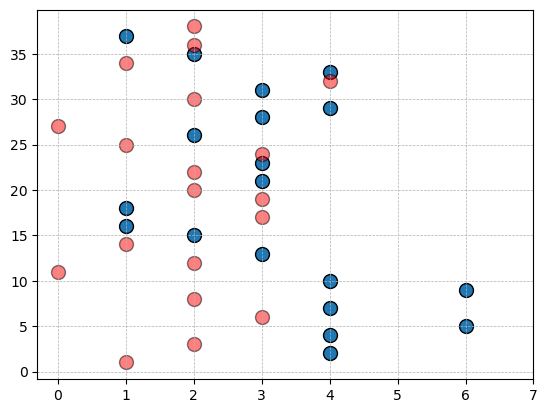

In [403]:
# Scatter plot of home goals MU and MU scored at home
fig, ax = plt.subplots()

ax.scatter(mc_h_sorted.home_club_goals, mc_h_sorted.matchday, edgecolors='black', s=100)
ax.scatter(mu_h_sorted.home_club_goals, mu_h_sorted.matchday, c='r', edgecolors='black', s=100, alpha=0.5)
ax.grid(visible=None, which='both', linestyle='--', linewidth=0.5)
ax.set_xticks(np.arange(0, 8, step=1))

plt.show()

In [232]:
# MU attendance at Old Trafford
mu_h_sorted.attendance.describe()

count       19.000000
mean     73814.789474
std        725.942726
min      73309.000000
25%      73460.500000
50%      73578.000000
75%      73696.500000
max      76000.000000
Name: attendance, dtype: float64

In [499]:
# MU home game with the highest attendance
mu_h_sorted.loc[mu_h_sorted.attendance == mu_h_sorted.attendance.max()][['home_club_name', 'away_club_name', 'aggregate', 'attendance']]

,home_club_name,away_club_name,aggregate,attendance
3,Manchester United,Liverpool FC,2:1,76000.0


In [501]:
# MC attendance at Home
mc_h_sorted.attendance.describe()

count       19.000000
mean     53249.052632
std        288.116580
min      52395.000000
25%      53167.500000
50%      53365.000000
75%      53431.500000
max      53490.000000
Name: attendance, dtype: float64

In [503]:
# MC home game with the highest attendance
mc_h_sorted.loc[mc_h_sorted.attendance == mc_h_sorted.attendance.max()][['home_club_name', 'away_club_name', 'aggregate', 'attendance']]

,home_club_name,away_club_name,aggregate,attendance
36,Manchester City,Chelsea FC,1:0,53490.0


In [304]:
def home_results(club_df: DataFrame) -> np.ndarray:
    ''''Calculates club's victories, draws and loses at home'''
    victories = 0
    draws = 0
    loses = 0
    for row in club_df[['home_club_goals', 'away_club_goals']].values:
        if row[0] > row[1]:
            victories += 1
        elif row[0] == row[1]:
            draws += 1
        elif row[0] < row[1]:
            loses += 1
        else:
            continue
    res = [victories, draws, loses]
    return np.array(res)
        
h_res = home_results(mu_h_sorted)
h_res

array([15,  3,  1])

In [405]:
mc_h_res = home_results(mc_h_sorted)

In [306]:
def away_results(club_df: DataFrame) -> np.ndarray:
    ''''Calculates club's victories, draws and loses away'''
    victories = 0
    draws = 0
    loses = 0
    for row in club_df[['home_club_goals', 'away_club_goals']].values:
        if row[0] < row[1]:
            victories += 1
        elif row[0] == row[1]:
            draws += 1
        elif row[0] > row[1]:
            loses += 1
        else:
            continue
    res = [victories, draws, loses]
    return np.array(res)

a_res = away_results(mu_a_sorted)
a_res

array([8, 3, 8])

In [407]:
mc_a_res = away_results(mc_a_sorted)

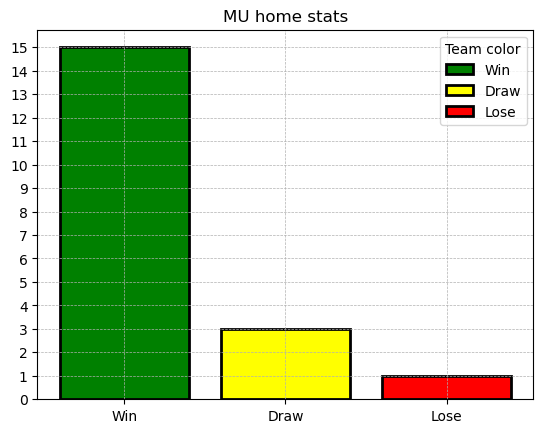

In [515]:
fig, ax = plt.subplots()

stats = [*h_res]
results = ['Win', 'Draw', 'Lose']

ax.bar(results, stats, label=['Win', 'Draw', 'Lose'], color=['green', 'yellow', 'red'], edgecolor='black', linewidth=2)
ax.grid(visible=None, which='both', linestyle='--', linewidth=0.5)
ax.set_yticks(np.arange(0, 16, 1))
ax.set_title('MU home stats')
ax.legend(title='Team color')
plt.show()

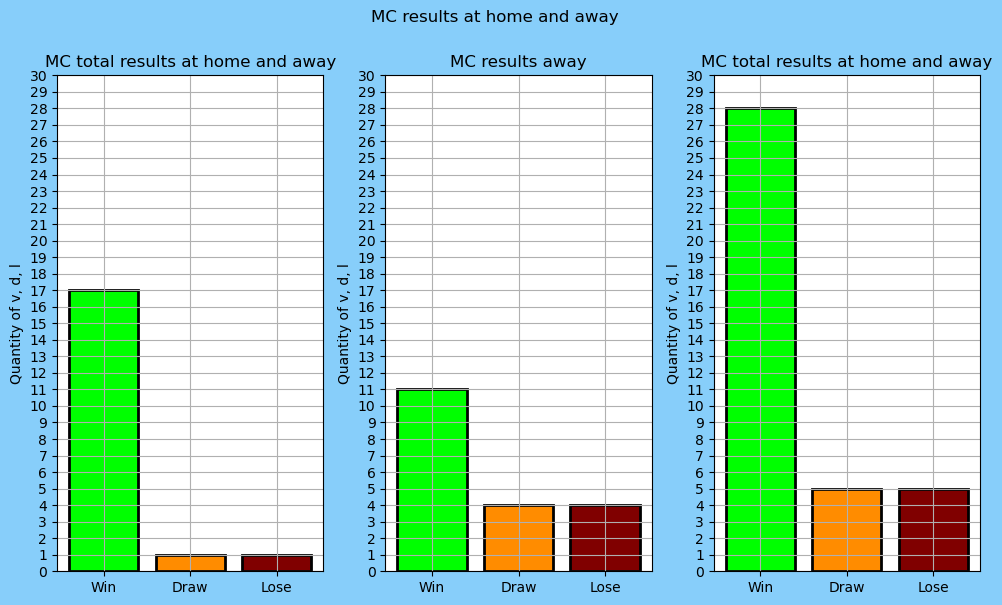

In [421]:
# MC results at home and away
fig = plt.figure(figsize=(10, 6), facecolor='lightskyblue', layout='constrained')

stats = [mc_h_res, mc_a_res, mc_h_res + mc_a_res]

for idx, stat in enumerate(stats):
    idx += 1
    axes = fig.add_subplot(1, 3, idx)
    axes.bar(results, [*stat], label=['Win', 'Draw', 'Lose'], color=['lime', 'darkorange', 'maroon'], edgecolor='black', linewidth=2)
    if idx == 1:
        axes.set_title("MC results at home")
    if idx == 2:
        axes.set_title("MC results away")
    else: 
        axes.set_title("MC total results at home and away")
    axes.set_yticks([i for i in range(0, 31)])
    axes.set_ylabel('Quantity of v, d, l')
    axes.grid()


fig.suptitle("MC results at home and away", va='baseline')
fig.set_tight_layout(True)

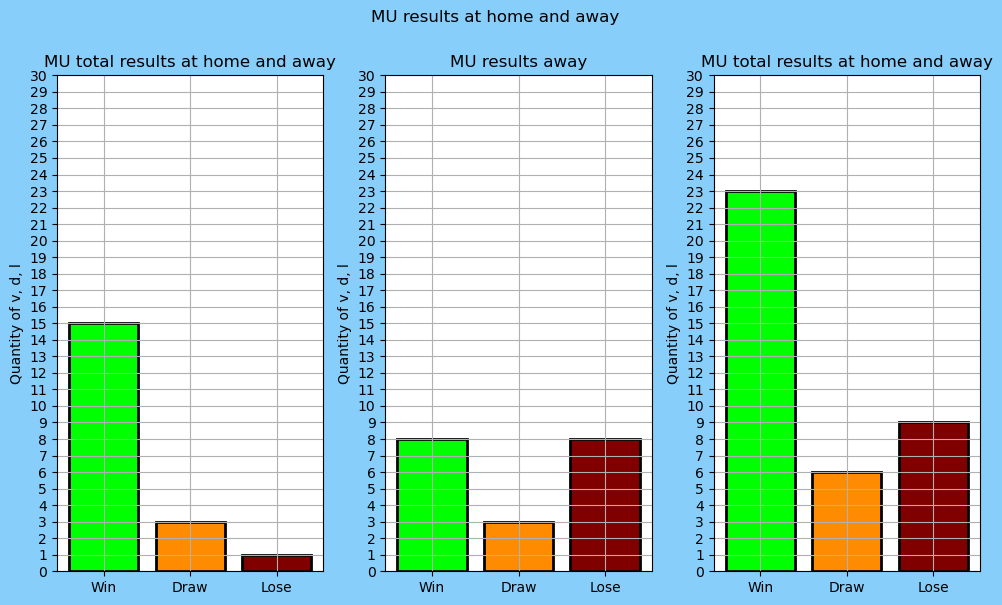

In [425]:
# MU results at home and away
fig = plt.figure(figsize=(10, 6), facecolor='lightskyblue', layout='constrained')

stats = [h_res, a_res, h_res + a_res]

for idx, stat in enumerate(stats):
    idx += 1
    axes = fig.add_subplot(1, 3, idx)
    axes.bar(results, [*stat], label=['Win', 'Draw', 'Lose'], color=['lime', 'darkorange', 'maroon'], edgecolor='black', linewidth=2)
    if idx == 1:
        axes.set_title("MU results at home")
    if idx == 2:
        axes.set_title("MU results away")
    else: 
        axes.set_title("MU total results at home and away")
    axes.set_yticks([i for i in range(0, 31)])
    axes.set_ylabel('Quantity of v, d, l')
    axes.grid()


fig.suptitle("MU results at home and away", va='baseline')
fig.set_tight_layout(True)

In [487]:
# MC total points 
mc_points = (mc_h_res + mc_a_res) * np.array([3, 1, 0])
mc_points = mc_points.sum()

In [505]:
# MU total points
mu_points = (h_res + a_res) * np.array([3, 1, 0]) # 3 points for a win, 1 point for a draw, 0 points for a lose
mu_points = mu_points.sum()

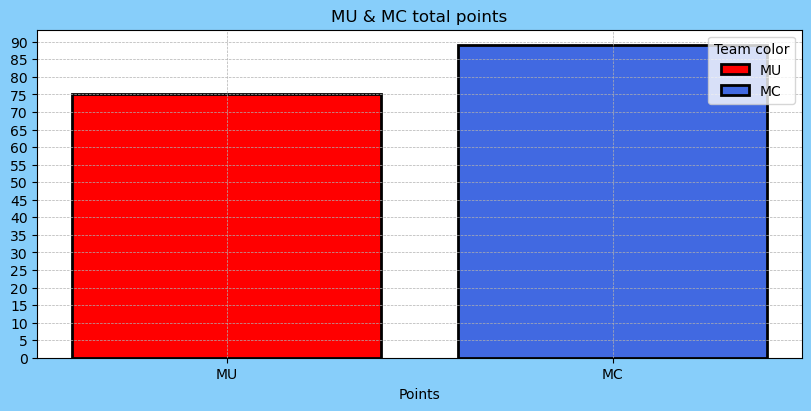

In [507]:
fig, ax = plt.subplots(figsize=(8, 4), facecolor='lightskyblue', layout='constrained')

points = [mu_points, mc_points]
results = ['MU', 'MC']

ax.bar(results, points, label=['MU', 'MC'], color=['red', 'royalblue'], edgecolor='black', linewidth=2)
ax.grid(visible=None, which='both', linestyle='--', linewidth=0.5)
ax.set_yticks([i for i in range(0, 91, 5)])
ax.set_xlabel('Team')
ax.set_xlabel('Points')
ax.set_title('MU & MC total points')
ax.legend(title='Team color')
plt.show()